# Lama: 

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from matplotlib.pyplot import pie, axis, show
from bidi.algorithm import get_display


from sklearn.model_selection import train_test_split

In [43]:
df = pd.read_csv("tamheer_2022.csv")

In [75]:
df['مؤهل المتدرب'].unique()

array(['دكتوراه', 'بكالوريوس', 'دبلوم', 'البكالوريوس أو ما يعادلها',
       'ماجستير', 'دبلوم تقني أو ما يعادله', 'الماجستير أو ما يعادلها',
       'دبلوم عال', 'أخرى', 'تعليم تقني عالي أو ما يعادله',
       'ثانوية أو ما يعادلها'], dtype=object)

In [79]:
df.replace({'مؤهل المتدرب': 'بكالوريوس'}, 
                 {'مؤهل المتدرب': 'البكالوريوس أو ما يعادلها'},inplace=True)
df.replace({'مؤهل المتدرب': 'ماجستير'}, 
                 {'مؤهل المتدرب': 'الماجستير أو ما يعادلها'},inplace=True)

In [80]:
df['مؤهل المتدرب'].unique()

array(['دكتوراه', 'البكالوريوس أو ما يعادلها', 'دبلوم',
       'الماجستير أو ما يعادلها', 'دبلوم تقني أو ما يعادله', 'دبلوم عال',
       'أخرى', 'تعليم تقني عالي أو ما يعادله', 'ثانوية أو ما يعادلها'],
      dtype=object)

In [45]:
df.drop(columns=["تاريخ الانتهاء","تاريخ الانسحاب","تاريخ بداية التدريب","تاريخ نهاية التدريب"], axis=1, inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112615 entries, 0 to 112614
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 112615 non-null  int64  
 1   جنس المتدرب                        112372 non-null  object 
 2   مدينة المتدرب                      111386 non-null  object 
 3   منطقة المتدرب                      111386 non-null  object 
 4   تخصص المتدرب                       106131 non-null  object 
 5   مؤهل المتدرب                       112416 non-null  object 
 6   معدل المتدرب                       97855 non-null   float64
 7   المعدل من                          97855 non-null   float64
 8   عمر المتدرب                        112615 non-null  int64  
 9   حالة المتدرب                       112615 non-null  object 
 10  اسم الفرصه التدريبية               112613 non-null  object 
 11  النشاط الاقتصادي للفرصة التدريبية  1126

In [47]:
df.describe()

,ID,معدل المتدرب,المعدل من,عمر المتدرب
count,112615.00000,97855.000000,97855.000000,112615.000000
mean,56308.00000,5.762873,1.685933,25.604156
std,32509.29462,13.806602,2.280288,2.155375
min,1.00000,0.000000,0.000000,24.000000
25%,28154.50000,2.810000,0.000000,24.000000
50%,56308.00000,3.330000,0.000000,25.000000
75%,84461.50000,4.000000,5.000000,26.000000
max,112615.00000,100.000000,5.000000,55.000000


In [48]:
df.isnull().sum()

ID                                       0
جنس المتدرب                            243
مدينة المتدرب                         1229
منطقة المتدرب                         1229
تخصص المتدرب                          6484
مؤهل المتدرب                           199
معدل المتدرب                         14760
المعدل من                            14760
عمر المتدرب                              0
حالة المتدرب                             0
اسم الفرصه التدريبية                     2
النشاط الاقتصادي للفرصة التدريبية        0
مؤهل التدريب                             0
حجم مؤسسة التدريب                        0
النشاط الاقتصادي لمؤسسة التدريب      39207
المؤسسة التعليمية للمتدرب             6462
dtype: int64

In [49]:
df.isnull().mean()*100

ID                                    0.000000
جنس المتدرب                           0.215779
مدينة المتدرب                         1.091329
منطقة المتدرب                         1.091329
تخصص المتدرب                          5.757670
مؤهل المتدرب                          0.176708
معدل المتدرب                         13.106602
المعدل من                            13.106602
عمر المتدرب                           0.000000
حالة المتدرب                          0.000000
اسم الفرصه التدريبية                  0.001776
النشاط الاقتصادي للفرصة التدريبية     0.000000
مؤهل التدريب                          0.000000
حجم مؤسسة التدريب                     0.000000
النشاط الاقتصادي لمؤسسة التدريب      34.815078
المؤسسة التعليمية للمتدرب             5.738134
dtype: float64

In [50]:
df.dropna(subset=['معدل المتدرب'], inplace=True)

In [51]:
df.dropna(subset=['تخصص المتدرب'], inplace=True)

In [52]:
df.isnull().mean()*100

ID                                    0.000000
جنس المتدرب                           0.161479
مدينة المتدرب                         0.832488
منطقة المتدرب                         0.832488
تخصص المتدرب                          0.000000
مؤهل المتدرب                          0.000000
معدل المتدرب                          0.000000
المعدل من                             0.000000
عمر المتدرب                           0.000000
حالة المتدرب                          0.000000
اسم الفرصه التدريبية                  0.002182
النشاط الاقتصادي للفرصة التدريبية     0.000000
مؤهل التدريب                          0.000000
حجم مؤسسة التدريب                     0.000000
النشاط الاقتصادي لمؤسسة التدريب      34.939391
المؤسسة التعليمية للمتدرب             0.884859
dtype: float64

### Feature Engineering

In [53]:
df.sample(random_state = 88)

,ID,جنس المتدرب,مدينة المتدرب,منطقة المتدرب,تخصص المتدرب,مؤهل المتدرب,معدل المتدرب,المعدل من,عمر المتدرب,حالة المتدرب,اسم الفرصه التدريبية,النشاط الاقتصادي للفرصة التدريبية,مؤهل التدريب,حجم مؤسسة التدريب,النشاط الاقتصادي لمؤسسة التدريب,المؤسسة التعليمية للمتدرب
40537,40538,انثى,العيون,المدينة المنورة,اللغة الانجليزية,بكالوريوس,3.69,0.0,25,مسجل,فني مختبر - الاحساء 2,أخصائي مختبرات طبية,بكالوريوس أو أعلى,عملاقة,الخدمات الطبية بالمصحات المتخصصة ومراكز إعادة ...,جامعة الإمام محمد بن سعود الإسلامية


In [54]:
df.loc[df['المعدل من'] == 4, 'معدل المتدرب'] = df.loc[df['المعدل من'] == 4, 'معدل المتدرب'] * 5/4
df['المعدل من'] = 5

##### Checking the difference before and after 

In [55]:
df.sample(random_state = 88)

,ID,جنس المتدرب,مدينة المتدرب,منطقة المتدرب,تخصص المتدرب,مؤهل المتدرب,معدل المتدرب,المعدل من,عمر المتدرب,حالة المتدرب,اسم الفرصه التدريبية,النشاط الاقتصادي للفرصة التدريبية,مؤهل التدريب,حجم مؤسسة التدريب,النشاط الاقتصادي لمؤسسة التدريب,المؤسسة التعليمية للمتدرب
40537,40538,انثى,العيون,المدينة المنورة,اللغة الانجليزية,بكالوريوس,3.69,5,25,مسجل,فني مختبر - الاحساء 2,أخصائي مختبرات طبية,بكالوريوس أو أعلى,عملاقة,الخدمات الطبية بالمصحات المتخصصة ومراكز إعادة ...,جامعة الإمام محمد بن سعود الإسلامية


In [56]:
df.sample(random_state = 22)

,ID,جنس المتدرب,مدينة المتدرب,منطقة المتدرب,تخصص المتدرب,مؤهل المتدرب,معدل المتدرب,المعدل من,عمر المتدرب,حالة المتدرب,اسم الفرصه التدريبية,النشاط الاقتصادي للفرصة التدريبية,مؤهل التدريب,حجم مؤسسة التدريب,النشاط الاقتصادي لمؤسسة التدريب,المؤسسة التعليمية للمتدرب
64820,64821,انثى,مكة المكرمة,مكة المكرمة,الدعوة والثقافة الإسلامية,بكالوريوس,2.22,5,24,مسجل,أخصائي إدارة صحية,أخصائي إدارة خدمات,بكالوريوس أو أعلى,كبيرة,NaN,جامعة أم القرى


In [57]:
df.isnull().sum()

ID                                       0
جنس المتدرب                            148
مدينة المتدرب                          763
منطقة المتدرب                          763
تخصص المتدرب                             0
مؤهل المتدرب                             0
معدل المتدرب                             0
المعدل من                                0
عمر المتدرب                              0
حالة المتدرب                             0
اسم الفرصه التدريبية                     2
النشاط الاقتصادي للفرصة التدريبية        0
مؤهل التدريب                             0
حجم مؤسسة التدريب                        0
النشاط الاقتصادي لمؤسسة التدريب      32023
المؤسسة التعليمية للمتدرب              811
dtype: int64

In [59]:
df.columns

Index(['ID', 'جنس المتدرب', 'مدينة المتدرب', 'منطقة المتدرب', 'تخصص المتدرب',
       'مؤهل المتدرب', 'معدل المتدرب', 'المعدل من', 'عمر المتدرب',
       'حالة المتدرب', 'اسم الفرصه التدريبية',
       'النشاط الاقتصادي للفرصة التدريبية', 'مؤهل التدريب',
       'حجم مؤسسة التدريب', 'النشاط الاقتصادي لمؤسسة التدريب',
       'المؤسسة التعليمية للمتدرب'],
      dtype='object')

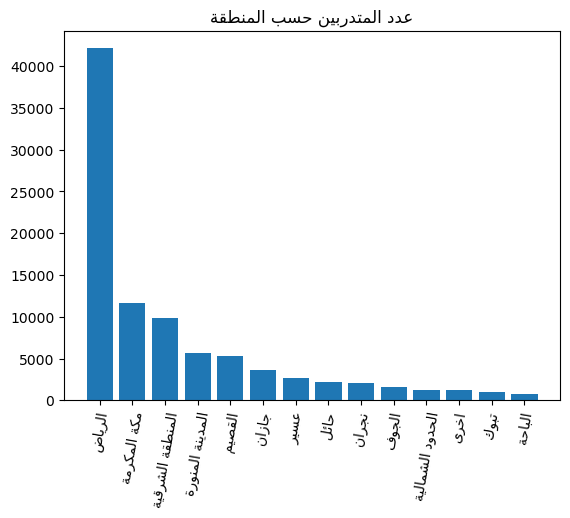

In [60]:
values = df['منطقة المتدرب'].value_counts()
total = sum(values)

fig, ax = plt.subplots()
labels = [arabic_reshaper.reshape(text) for text in values.index]
labels = [get_display(label) for label in labels]
ax.bar(labels, values)
title = "عدد المتدربين حسب المنطقة"
title = arabic_reshaper.reshape(title)
title = get_display(title)
ax.set_title(title)

plt.xticks(rotation=80)
plt.show()

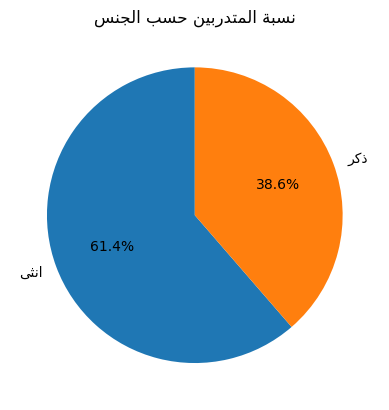

In [61]:
values = df['جنس المتدرب'].value_counts()
total = sum(values)

fig, ax = plt.subplots()
labels = [arabic_reshaper.reshape(text) for text in values.index]
labels = [get_display(label) for label in labels]
ax.pie(values, labels=labels, autopct=lambda pct: "{:.1f}%".format(pct), startangle=90)
title = "نسبة المتدربين حسب الجنس"
title = arabic_reshaper.reshape(title)
title = get_display(title)
ax.set_title(title)

plt.show()

In [62]:
df.columns

Index(['ID', 'جنس المتدرب', 'مدينة المتدرب', 'منطقة المتدرب', 'تخصص المتدرب',
       'مؤهل المتدرب', 'معدل المتدرب', 'المعدل من', 'عمر المتدرب',
       'حالة المتدرب', 'اسم الفرصه التدريبية',
       'النشاط الاقتصادي للفرصة التدريبية', 'مؤهل التدريب',
       'حجم مؤسسة التدريب', 'النشاط الاقتصادي لمؤسسة التدريب',
       'المؤسسة التعليمية للمتدرب'],
      dtype='object')

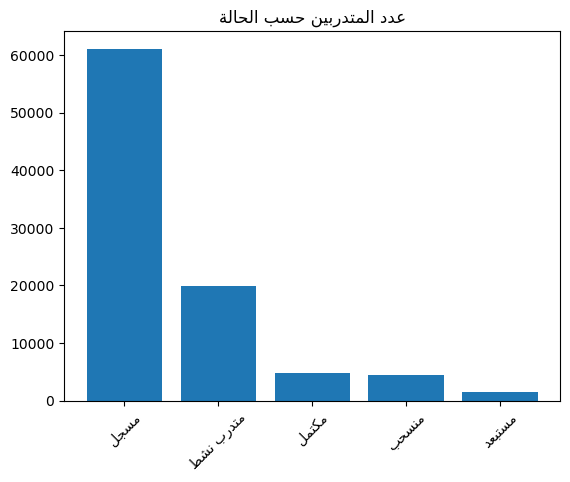

In [63]:

values = df['حالة المتدرب'].value_counts()
total = sum(values)

fig, ax = plt.subplots()
labels = [arabic_reshaper.reshape(text) for text in values.index]
labels = [get_display(label) for label in labels]
ax.bar(labels, values)
title = "عدد المتدربين حسب الحالة"
title = arabic_reshaper.reshape(title)
title = get_display(title)
ax.set_title(title)

plt.xticks(rotation=45)
plt.show()

In [64]:
df.corr()


,ID,معدل المتدرب,المعدل من,عمر المتدرب
ID,1.000000,-0.111387,NaN,-0.663833
معدل المتدرب,-0.111387,1.000000,NaN,0.164970
المعدل من,NaN,NaN,NaN,NaN
عمر المتدرب,-0.663833,0.164970,NaN,1.000000


In [65]:
df.head()

,ID,جنس المتدرب,مدينة المتدرب,منطقة المتدرب,تخصص المتدرب,مؤهل المتدرب,معدل المتدرب,المعدل من,عمر المتدرب,حالة المتدرب,اسم الفرصه التدريبية,النشاط الاقتصادي للفرصة التدريبية,مؤهل التدريب,حجم مؤسسة التدريب,النشاط الاقتصادي لمؤسسة التدريب,المؤسسة التعليمية للمتدرب
1,2,انثى,ام نخيلة,الجوف,علوم الحاسب الآلي والمعلوماتية,دكتوراه,88.93,5,51,مسجل,مبرمج,محلل مبرمج,بكالوريوس أو أعلى,كبيرة,NaN,OAKLAND UNIVERSITY
2,3,ذكر,الخرخير,نجران,الهندسة المدنية,بكالوريوس,2.05,5,37,مسجل,هندسة مدنية,مهندس مدني,بكالوريوس أو أعلى,عملاقة,نقل المياة عبر خطوط الانابيب,جامعة أم القرى
3,4,ذكر,الخرخير,نجران,الهندسة المدنية,بكالوريوس,2.05,5,37,مسجل,مهندس مدني مؤسسه مقاولات,مهندس مدني,بكالوريوس أو أعلى,صغيرة فئة ب,الإنشاءات العامة للمباني السكنية,جامعة أم القرى
4,5,ذكر,الخرخير,نجران,الهندسة المدنية,بكالوريوس,2.05,5,37,مسجل,مهندس مدني - الخدمات العامة,مهندس مدني,بكالوريوس أو أعلى,كبيرة,NaN,جامعة أم القرى
5,6,ذكر,الخرخير,نجران,الهندسة المدنية,بكالوريوس,2.05,5,37,مسجل,أخصائي إدارة مشاريع - منطقة الباحة,أخصائي إدارة مشاريع,بكالوريوس أو أعلى,كبيرة,NaN,جامعة أم القرى


# Data Preprocessing

In [103]:
X = df.drop('حالة المتدرب', axis=1)
y = df['حالة المتدرب']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
df

,ID,جنس المتدرب,مدينة المتدرب,منطقة المتدرب,تخصص المتدرب,مؤهل المتدرب,معدل المتدرب,المعدل من,عمر المتدرب,حالة المتدرب,اسم الفرصه التدريبية,النشاط الاقتصادي للفرصة التدريبية,مؤهل التدريب,حجم مؤسسة التدريب,النشاط الاقتصادي لمؤسسة التدريب,المؤسسة التعليمية للمتدرب
1,2,0,0,2,402,8,88.93,5,51,مسجل,5770,319,0,3,970,54
2,3,1,57,13,285,1,2.05,5,37,مسجل,8670,466,0,2,954,157
3,4,1,57,13,285,1,2.05,5,37,مسجل,8439,466,0,1,216,157
4,5,1,57,13,285,1,2.05,5,37,مسجل,8418,466,0,3,970,157
5,6,1,57,13,285,1,2.05,5,37,مسجل,966,17,0,3,970,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112610,112611,0,5,11,436,1,4.13,5,24,متدرب نشط,4512,17,0,3,970,191
112611,112612,0,5,11,436,1,4.13,5,24,متدرب نشط,982,31,0,2,423,191
112612,112613,0,5,11,436,1,4.13,5,24,متدرب نشط,3191,137,0,4,116,191
112613,112614,0,5,11,436,1,4.13,5,24,متدرب نشط,2735,99,0,3,677,191


In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
label_encoder=LabelEncoder()

In [107]:
df['جنس المتدرب']=label_encoder.fit_transform(df['جنس المتدرب'])
df['مدينة المتدرب']=label_encoder.fit_transform(df['مدينة المتدرب'])
df['منطقة المتدرب']=label_encoder.fit_transform(df['منطقة المتدرب'])
df['تخصص المتدرب']=label_encoder.fit_transform(df['تخصص المتدرب'])
df['مؤهل المتدرب']=label_encoder.fit_transform(df['مؤهل المتدرب'])
df['اسم الفرصه التدريبية']=label_encoder.fit_transform(df['اسم الفرصه التدريبية'])
df['النشاط الاقتصادي للفرصة التدريبية']=label_encoder.fit_transform(df['النشاط الاقتصادي للفرصة التدريبية'])
df['مؤهل التدريب']=label_encoder.fit_transform(df['مؤهل التدريب'])
df['حجم مؤسسة التدريب']=label_encoder.fit_transform(df['حجم مؤسسة التدريب'])
df['النشاط الاقتصادي لمؤسسة التدريب']=label_encoder.fit_transform(df['النشاط الاقتصادي لمؤسسة التدريب'])
df['المؤسسة التعليمية للمتدرب']=label_encoder.fit_transform(df['المؤسسة التعليمية للمتدرب'])

In [108]:
df

,ID,جنس المتدرب,مدينة المتدرب,منطقة المتدرب,تخصص المتدرب,مؤهل المتدرب,معدل المتدرب,المعدل من,عمر المتدرب,حالة المتدرب,اسم الفرصه التدريبية,النشاط الاقتصادي للفرصة التدريبية,مؤهل التدريب,حجم مؤسسة التدريب,النشاط الاقتصادي لمؤسسة التدريب,المؤسسة التعليمية للمتدرب
1,2,0,0,2,402,8,88.93,5,51,مسجل,5770,319,0,3,970,54
2,3,1,57,13,285,1,2.05,5,37,مسجل,8670,466,0,2,954,157
3,4,1,57,13,285,1,2.05,5,37,مسجل,8439,466,0,1,216,157
4,5,1,57,13,285,1,2.05,5,37,مسجل,8418,466,0,3,970,157
5,6,1,57,13,285,1,2.05,5,37,مسجل,966,17,0,3,970,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112610,112611,0,5,11,436,1,4.13,5,24,متدرب نشط,4512,17,0,3,970,191
112611,112612,0,5,11,436,1,4.13,5,24,متدرب نشط,982,31,0,2,423,191
112612,112613,0,5,11,436,1,4.13,5,24,متدرب نشط,3191,137,0,4,116,191
112613,112614,0,5,11,436,1,4.13,5,24,متدرب نشط,2735,99,0,3,677,191


In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [122]:
clf1=RandomForestClassifier()

In [123]:
clf1.fit(X_train,y_train)

RandomForestClassifier()

In [124]:
y_pred1=clf1.predict(X_test)

In [125]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9927445311221428


In [127]:
print('Random Forest')
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

Random Forest
[[ 3876     0    84     0    12]
 [    0   304     4     0     0]
 [    0     0 12155     0     7]
 [    0     0    18   914     0]
 [    0     0     8     0   949]]
              precision    recall  f1-score   support

   متدرب نشط       1.00      0.98      0.99      3972
      مستبعد       1.00      0.99      0.99       308
        مسجل       0.99      1.00      1.00     12162
       مكتمل       1.00      0.98      0.99       932
       منسحب       0.98      0.99      0.99       957

    accuracy                           0.99     18331
   macro avg       0.99      0.99      0.99     18331
weighted avg       0.99      0.99      0.99     18331

